<a href="https://colab.research.google.com/github/pedrocacioli8/AulasSirius/blob/main/C%C3%B3pia_de_Sirius_Atividade_Regressao_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [ ]:
# this method converts the given link of public shared CSV on Google Drive into a download link
# works if file size is not above 100MB (limit of virus scan)
url='https://drive.google.com/file/d/1KGAkB5i_uZf6A8-tc5OdLY3iME0T4Mwp/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Obs: Na célula abaixo há um código para renomear as colunas.

In [ ]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

In [ ]:
df.corr(method='')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [ ]:
from scipy.stats import pointbiserialr as pb_corr

bool_columns = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

for column in bool_columns:
  print('Column: {} Result: {}'.format(column, pb_corr(df[column], df['fraud'])))

Column: distance_from_home Result: SignificanceResult(statistic=0.18757078277071004, pvalue=0.0)
Column: distance_from_last_transaction Result: SignificanceResult(statistic=0.09191691230926796, pvalue=0.0)
Column: ratio_to_median_purchase_price Result: SignificanceResult(statistic=0.4623047222882616, pvalue=0.0)
Column: repeat_retailer Result: SignificanceResult(statistic=-0.0013574501055803644, pvalue=0.17463857703196742)
Column: used_chip Result: SignificanceResult(statistic=-0.060974597607936935, pvalue=0.0)
Column: used_pin_number Result: SignificanceResult(statistic=-0.10029253729157156, pvalue=0.0)
Column: online_order Result: SignificanceResult(statistic=0.19197252239626503, pvalue=0.0)


## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

In [ ]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [ ]:
# separando as variáveis X e y
X = df[['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']]
y = df['fraud']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [ ]:
X.shape

(174806, 7)

In [ ]:
y.shape

(174806,)

In [ ]:
y.value_counts()

0.0    87403
1.0    87403
Name: fraud, dtype: int64

## Atividade 4: Crie um modelo de regressão logística.

In [ ]:
X = sm.add_constant(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import statsmodels.api as sm

In [ ]:
modelo = sm.Logit(y_train, X_train).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.209851
         Iterations 10


## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [ ]:
modelo.params

const                             -7.746281
distance_from_home                 0.029462
distance_from_last_transaction     0.051445
ratio_to_median_purchase_price     1.221623
repeat_retailer                   -1.472629
used_chip                         -1.189076
used_pin_number                  -10.012846
online_order                       5.099901
dtype: float64

In [ ]:
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               122364
Model:                          Logit   Df Residuals:                   122356
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.6972
Time:                        23:16:23   Log-Likelihood:                -25678.
converged:                       True   LL-Null:                       -84816.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.7463      0.065   -119.307      0.000      -7.874      -7.619
distance_from_home                 0.0295      0.000    109.290      0.

## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [ ]:
modelo.predict(X_test)

24894     0.067708
80057     0.010832
168786    0.870429
142940    0.574744
98740     1.000000
            ...   
109310    0.618637
103051    0.931119
116688    0.914037
139320    0.566126
82133     0.211483
Length: 52442, dtype: float64

In [ ]:
y_pred_train = (modelo.predict(X_train) >= 0.5).astype(int)

In [ ]:
y_pred_test = (modelo.predict(X_test) >= 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao_train = confusion_matrix(y_train, y_pred_train)
matriz_confusao_train

array([[57073,  4099],
       [ 3034, 58158]])

In [ ]:
matriz_confusao_test = confusion_matrix(y_test, y_pred_test)
matriz_confusao_test

array([[24469,  1762],
       [ 1344, 24867]])

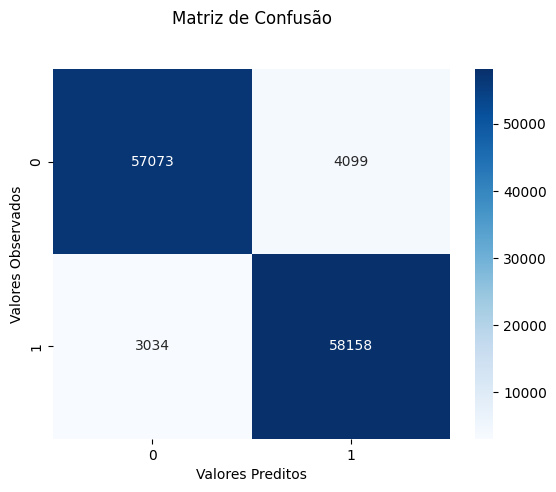

In [ ]:
sns.heatmap(matriz_confusao_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

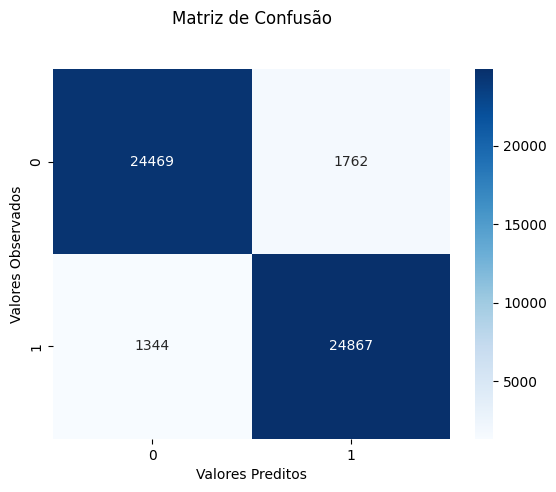

In [ ]:
sns.heatmap(matriz_confusao_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

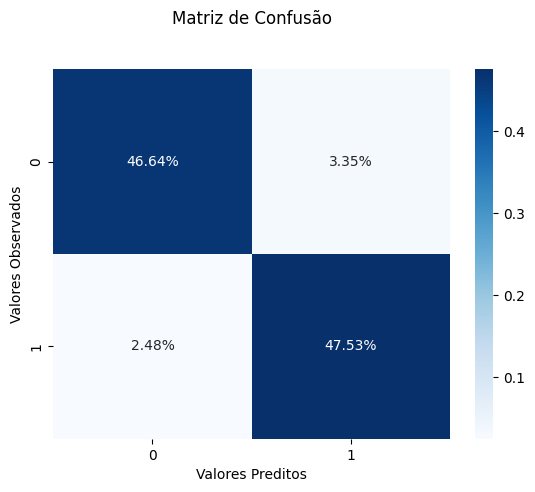

In [ ]:
sns.heatmap(matriz_confusao_train/np.sum(matriz_confusao_train),
            annot=True, fmt='.2%', cmap='Blues');

plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

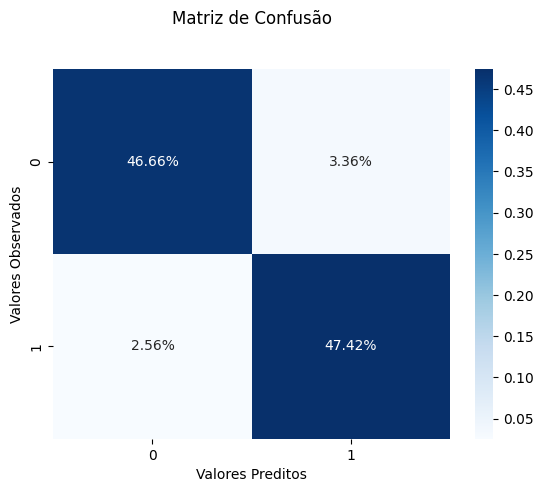

In [ ]:
sns.heatmap(matriz_confusao_test/np.sum(matriz_confusao_test),
            annot=True, fmt='.2%', cmap='Blues');

plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     61172
         1.0       0.93      0.95      0.94     61192

    accuracy                           0.94    122364
   macro avg       0.94      0.94      0.94    122364
weighted avg       0.94      0.94      0.94    122364



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     26231
         1.0       0.93      0.95      0.94     26211

    accuracy                           0.94     52442
   macro avg       0.94      0.94      0.94     52442
weighted avg       0.94      0.94      0.94     52442



## Atividade 8: Crie a curva ROC para este modelo.

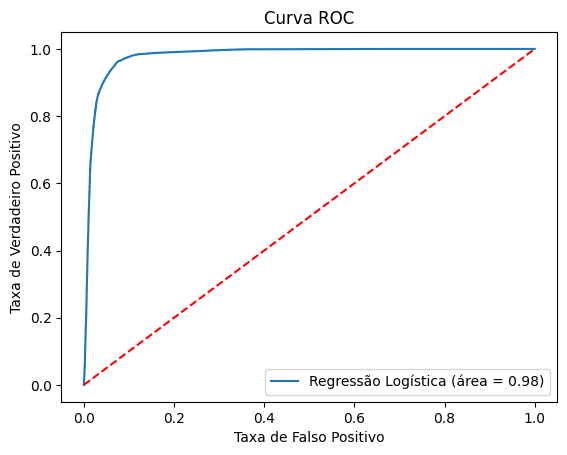

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y_test, modelo.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, modelo.predict(X_test))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [ ]:
x_prediction = {'const':[1],
                'distance_from_home': [82],
                'distance_from_last_transaction':[13],
                'ratio_to_median_purchase_price':[14],
                'repeat_retailer':[1],
                'used_chip':[0],
                'used_pin_number':[0],
                'online_order':[1]}
x_prediction = pd.DataFrame(x_prediction)

#prediction = (modelo.predict(x_prediction) >= 0.5).astype(int)
prediction = modelo.predict(x_prediction)

In [ ]:
print(prediction)

0    1.0
dtype: float64


## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [ ]:
X2 = df[['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']]
y2 = df['fraud']

In [ ]:
X2 = sm.add_constant(X2)

In [ ]:
modelo2 = sm.Logit(y2, X2).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12


In [ ]:
print(modelo2.summary())

                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.5423
Time:                        23:52:37   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -10.3611      0.044   -237.200      0.000     -10.447     -10.275
distance_from_home                 0.0152   8.32e-05    182.831      0.

In [ ]:
y_pred2 = (modelo2.predict(X2) >= 0.5).astype(int)

In [ ]:
matriz_confusao2 = confusion_matrix(y2, y_pred2)
matriz_confusao2

array([[906272,   6325],
       [ 34837,  52566]])

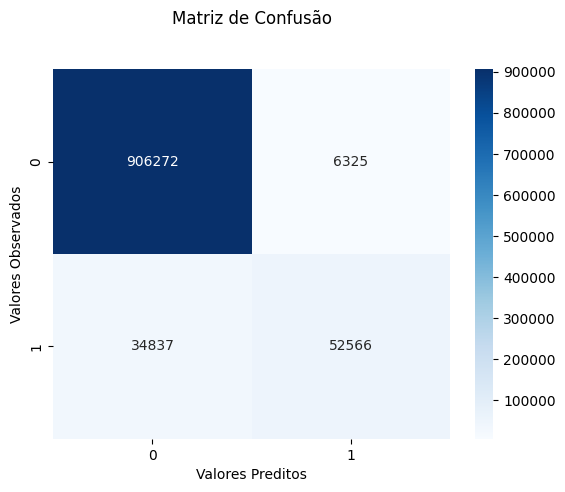

In [ ]:
sns.heatmap(matriz_confusao2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

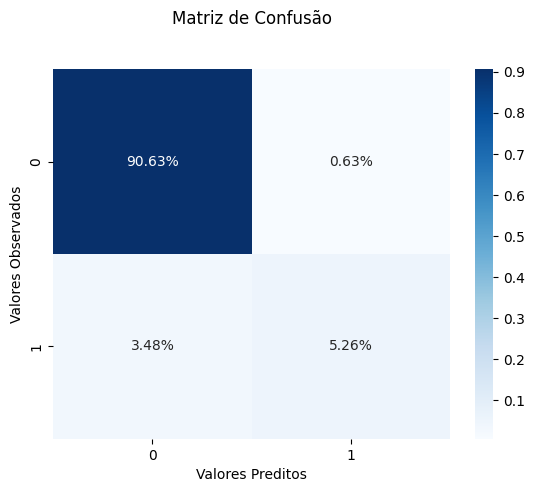

In [ ]:
sns.heatmap(matriz_confusao2/np.sum(matriz_confusao2),
            annot=True, fmt='.2%', cmap='Blues');

plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.89      0.60      0.72     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.80      0.85   1000000
weighted avg       0.96      0.96      0.96   1000000



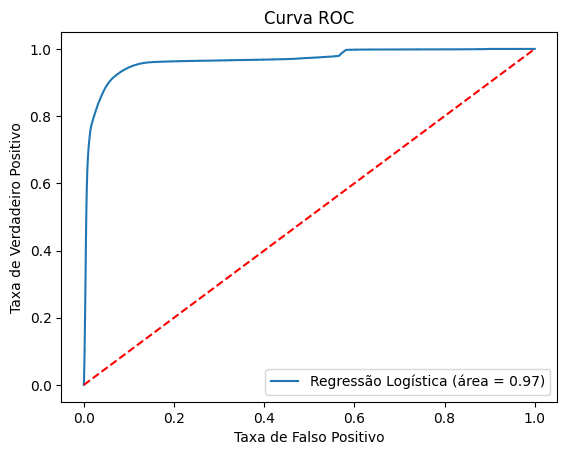

In [ ]:
logit_roc_auc = roc_auc_score(y2, modelo2.predict(X2))
fpr, tpr, thresholds = roc_curve(y2, modelo2.predict(X2))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");